# Heart Dicease Prediction

In [42]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas_profiling

In [43]:
df=pd.read_csv('heart_Disease.csv')
df.head()
print(df.shape)

(303, 14)


In [44]:
df.profile_report(title='Heart Dicease')

In [45]:
df = pd.get_dummies(df, columns = ['cp', 'ca', 'thal'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,...,cp_3,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,...,1,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,...,0,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,2,...,0,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,2,...,0,1,0,0,0,0,0,0,1,0


In [46]:
!pip install yellowbrick
from yellowbrick.target import ClassBalance
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

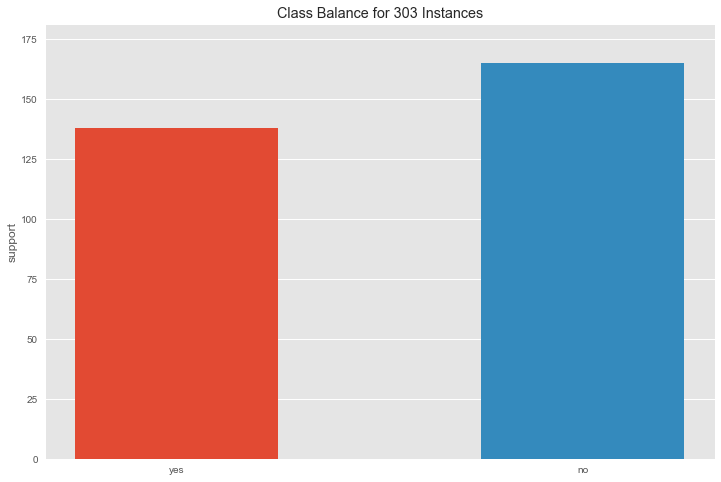

In [47]:
visualizer = ClassBalance(labels=['yes','no'])
visualizer.fit(df.target)
visualizer.show();

In [48]:
X = df.loc[:, df.columns != 'target']
epsilon = 1e-10
X_mean = np.mean(X)
X_std = np.std(X)
X = (X-X_mean)/(X_std + epsilon)
y = df.target

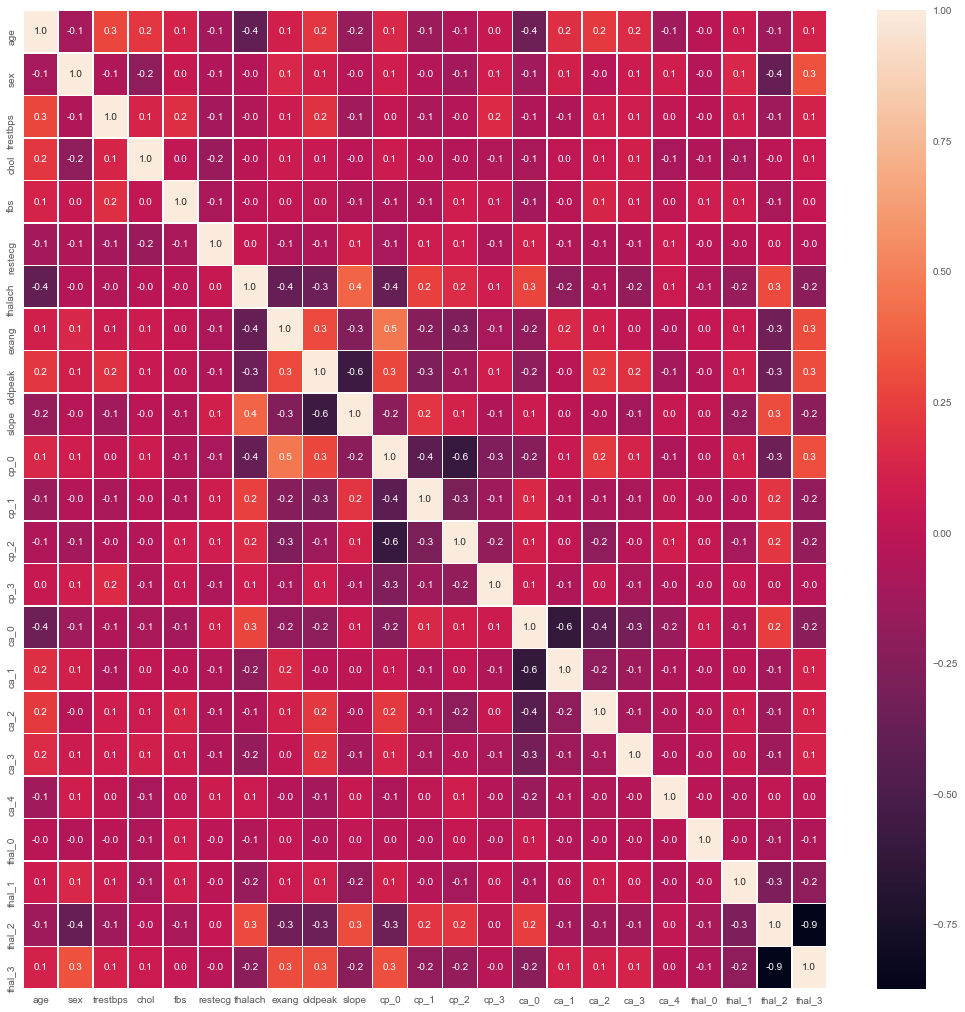

In [49]:
import seaborn as sns 
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [52]:
@interact
def plot_tree_rf(crit=["gini", "entropy"],
                 bootstrap=["True", "False"],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                       criterion=crit,
                                       bootstrap=bootstrap,
                                       n_estimators=forests,
                                       max_depth=depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf,
                                       n_jobs=-1,
                                      verbose=False).fit(X_train, y_train)

    print('Random Forest Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Random Forest Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
    num_tree = estimator.estimators_[0]
    print('\nVisualizing Decision Tree:', 0)
    
    graph = Source(tree.export_graphviz(num_tree,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [53]:
from sklearn.model_selection import cross_val_score
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion=crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(X_train, y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

    graph = Source(tree.export_graphviz(estimator,
                                        out_file=None,
                                        feature_names=X_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

### XGBoost Model

In [54]:
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

Accuracy is:  0.8360655737704918


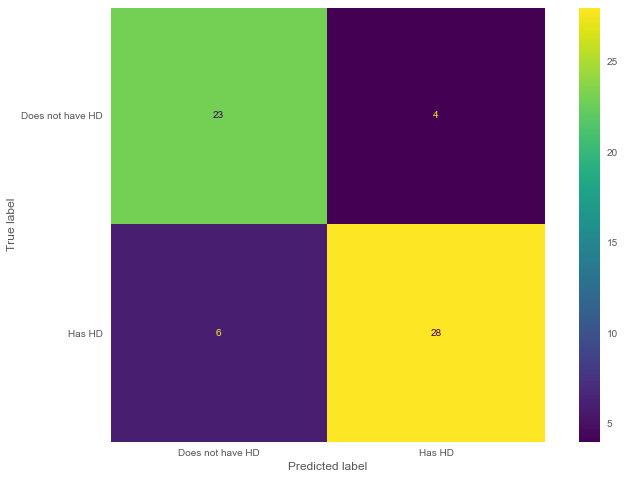

In [55]:
clf1 = xgb.XGBClassifier()
clf1 = clf1.fit(X_train, y_train)
ac = accuracy_score(y_test,clf1.predict(X_test))
print('Accuracy is: ',ac)
plot_confusion_matrix(clf1, X_test, y_test, display_labels=["Does not have HD", "Has HD"])
plt.grid(False)

### Recursive Feature Elimination with Cross-Validation

Accuracy is:  0.8524590163934426


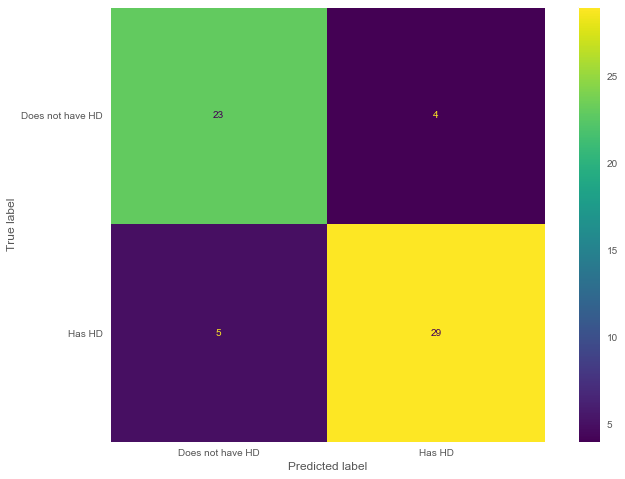

In [56]:
from sklearn.feature_selection import RFECV

clf2 = xgb.XGBClassifier()
rfecv = RFECV(estimator=clf2, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
ac2 = accuracy_score(y_test,rfecv.predict(X_test))
print('Accuracy is: ',ac2)
plot_confusion_matrix(rfecv, X_test, y_test, display_labels=["Does not have HD", "Has HD"])
plt.grid(False)

In [57]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

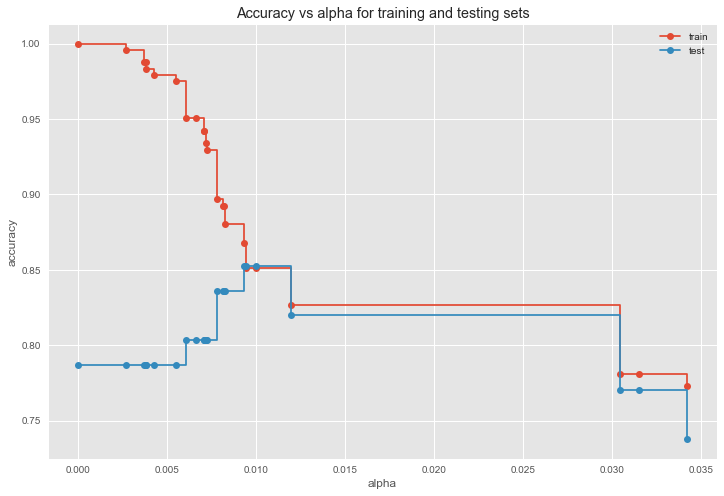

In [58]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [59]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

In [60]:
alpha_results[(alpha_results['alpha'] > 0.009) & (alpha_results['alpha'] < 0.012)]

,alpha,mean_accuracy,std
17,0.009298,0.797789,0.033914
18,0.009445,0.801871,0.029468
19,0.009972,0.814371,0.037575
20,0.011966,0.785629,0.052585


In [61]:
ideal_ccp_alpha = float(0.009972)

In [62]:
clf_dt_pruned = DecisionTreeClassifier(
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

ac3 = accuracy_score(y_test,clf_dt_pruned.predict(X_test))
print('Accuracy is: ',ac3)

Accuracy is:  0.8524590163934426


In [63]:
from tensorflow.python.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [64]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)
print('X_train shape: ', X_train.shape)

y_train shape:  (242, 2)
y_test shape:  (61, 2)
X_train shape:  (242, 23)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (23,)),
    Dense(128, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

model.compile(
    optimizer = 'sgd',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

h = model.fit(
    X_train,
    y_train_encoded,
    epochs = 500
)



Epoch 1/500
242/242 [==============================] - 0s 651us/sample - loss: 0.7536 - accuracy: 0.3512
Epoch 2/500
242/242 [==============================] - 0s 47us/sample - loss: 0.7481 - accuracy: 0.3636
Epoch 3/500
242/242 [==============================] - 0s 73us/sample - loss: 0.7427 - accuracy: 0.3843
Epoch 4/500
242/242 [==============================] - 0s 56us/sample - loss: 0.7374 - accuracy: 0.3884
Epoch 5/500
242/242 [==============================] - 0s 50us/sample - loss: 0.7323 - accuracy: 0.3967
Epoch 6/500
242/242 [==============================] - 0s 68us/sample - loss: 0.7270 - accuracy: 0.4091
Epoch 7/500
242/242 [==============================] - 0s 48us/sample - loss: 0.7219 - accuracy: 0.4215
Epoch 8/500
242/242 [==============================] - 0s 49us/sample - loss: 0.7169 - accuracy: 0.4298
Epoch 9/500
242/242 [==============================] - 0s 72us/sample - loss: 0.7121 - accuracy: 0.4339
Epoch 10/500
242/242 [==============================] - 0s 73us

242/242 [==============================] - 0s 70us/sample - loss: 0.5065 - accuracy: 0.8306
Epoch 80/500
242/242 [==============================] - 0s 63us/sample - loss: 0.5046 - accuracy: 0.8347
Epoch 81/500
242/242 [==============================] - 0s 68us/sample - loss: 0.5028 - accuracy: 0.8306
Epoch 82/500
242/242 [==============================] - 0s 64us/sample - loss: 0.5010 - accuracy: 0.8306
Epoch 83/500
242/242 [==============================] - 0s 65us/sample - loss: 0.4992 - accuracy: 0.8306
Epoch 84/500
242/242 [==============================] - 0s 87us/sample - loss: 0.4975 - accuracy: 0.8306
Epoch 85/500
242/242 [==============================] - 0s 75us/sample - loss: 0.4957 - accuracy: 0.8306
Epoch 86/500
242/242 [==============================] - 0s 75us/sample - loss: 0.4939 - accuracy: 0.8306
Epoch 87/500
242/242 [==============================] - 0s 73us/sample - loss: 0.4922 - accuracy: 0.8306
Epoch 88/500
242/242 [==============================] - 0s 89us/samp

242/242 [==============================] - 0s 57us/sample - loss: 0.4047 - accuracy: 0.8512
Epoch 157/500
242/242 [==============================] - 0s 61us/sample - loss: 0.4039 - accuracy: 0.8512
Epoch 158/500
242/242 [==============================] - 0s 72us/sample - loss: 0.4029 - accuracy: 0.8512
Epoch 159/500
242/242 [==============================] - 0s 88us/sample - loss: 0.4020 - accuracy: 0.8512
Epoch 160/500
242/242 [==============================] - 0s 73us/sample - loss: 0.4011 - accuracy: 0.8512
Epoch 161/500
242/242 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.78 - 0s 77us/sample - loss: 0.4003 - accuracy: 0.8512
Epoch 162/500
242/242 [==============================] - 0s 76us/sample - loss: 0.3994 - accuracy: 0.8512
Epoch 163/500
242/242 [==============================] - 0s 79us/sample - loss: 0.3985 - accuracy: 0.8512
Epoch 164/500
242/242 [==============================] - 0s 70us/sample - loss: 0.3977 - accuracy: 0.8512
Epoch 165/500
242/

242/242 [==============================] - 0s 55us/sample - loss: 0.3528 - accuracy: 0.8595
Epoch 233/500
242/242 [==============================] - 0s 64us/sample - loss: 0.3524 - accuracy: 0.8595
Epoch 234/500
242/242 [==============================] - 0s 69us/sample - loss: 0.3518 - accuracy: 0.8595
Epoch 235/500
242/242 [==============================] - 0s 60us/sample - loss: 0.3513 - accuracy: 0.8595
Epoch 236/500
242/242 [==============================] - 0s 70us/sample - loss: 0.3508 - accuracy: 0.8595
Epoch 237/500
242/242 [==============================] - 0s 79us/sample - loss: 0.3503 - accuracy: 0.8595
Epoch 238/500
242/242 [==============================] - 0s 51us/sample - loss: 0.3499 - accuracy: 0.8595
Epoch 239/500
242/242 [==============================] - 0s 67us/sample - loss: 0.3493 - accuracy: 0.8595
Epoch 240/500
242/242 [==============================] - 0s 77us/sample - loss: 0.3489 - accuracy: 0.8636
Epoch 241/500
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 62us/sample - loss: 0.3216 - accuracy: 0.8719
Epoch 310/500
242/242 [==============================] - 0s 61us/sample - loss: 0.3212 - accuracy: 0.8719
Epoch 311/500
242/242 [==============================] - 0s 73us/sample - loss: 0.3209 - accuracy: 0.8719
Epoch 312/500
242/242 [==============================] - 0s 63us/sample - loss: 0.3206 - accuracy: 0.8719
Epoch 313/500
242/242 [==============================] - 0s 66us/sample - loss: 0.3203 - accuracy: 0.8719
Epoch 314/500
242/242 [==============================] - 0s 61us/sample - loss: 0.3200 - accuracy: 0.8719
Epoch 315/500
242/242 [==============================] - 0s 62us/sample - loss: 0.3197 - accuracy: 0.8719
Epoch 316/500
242/242 [==============================] - 0s 67us/sample - loss: 0.3194 - accuracy: 0.8719
Epoch 317/500
242/242 [==============================] - 0s 78us/sample - loss: 0.3191 - accuracy: 0.8719
Epoch 318/500
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 71us/sample - loss: 0.3009 - accuracy: 0.8760
Epoch 387/500
242/242 [==============================] - 0s 55us/sample - loss: 0.3006 - accuracy: 0.8760
Epoch 388/500
242/242 [==============================] - 0s 69us/sample - loss: 0.3003 - accuracy: 0.8760
Epoch 389/500
242/242 [==============================] - 0s 79us/sample - loss: 0.3001 - accuracy: 0.8760
Epoch 390/500
242/242 [==============================] - 0s 81us/sample - loss: 0.2999 - accuracy: 0.8760
Epoch 391/500
242/242 [==============================] - 0s 67us/sample - loss: 0.2997 - accuracy: 0.8760
Epoch 392/500
242/242 [==============================] - 0s 61us/sample - loss: 0.2995 - accuracy: 0.8760
Epoch 393/500
242/242 [==============================] - 0s 68us/sample - loss: 0.2993 - accuracy: 0.8760
Epoch 394/500
242/242 [==============================] - 0s 77us/sample - loss: 0.2990 - accuracy: 0.8760
Epoch 395/500
242/242 [==============================] - 0s 

242/242 [==============================] - 0s 60us/sample - loss: 0.2852 - accuracy: 0.8926
Epoch 464/500
242/242 [==============================] - 0s 56us/sample - loss: 0.2849 - accuracy: 0.8926
Epoch 465/500
242/242 [==============================] - 0s 76us/sample - loss: 0.2848 - accuracy: 0.8926
Epoch 466/500
242/242 [==============================] - 0s 57us/sample - loss: 0.2846 - accuracy: 0.8926
Epoch 467/500
242/242 [==============================] - 0s 86us/sample - loss: 0.2844 - accuracy: 0.8926
Epoch 468/500
242/242 [==============================] - 0s 77us/sample - loss: 0.2842 - accuracy: 0.8926
Epoch 469/500
242/242 [==============================] - 0s 80us/sample - loss: 0.2841 - accuracy: 0.8926
Epoch 470/500
242/242 [==============================] - 0s 84us/sample - loss: 0.2839 - accuracy: 0.8926
Epoch 471/500
242/242 [==============================] - 0s 68us/sample - loss: 0.2837 - accuracy: 0.8926
Epoch 472/500
242/242 [==============================] - 0s 

In [77]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

61/61 [==============================] - 0s 2ms/sample - loss: 0.3464 - accuracy: 0.9016
test set accuracy:  90.16393423080444
